In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Introduction

This project aims to develop machine learning models that can be used to detect whether a message is a spam. First I transform the mail into vector form so that it can be used as input for machine learning algorithms (Logistic Regression and Naive Bayes). Next I train a machine learning model to learn to discriminate between normal and spam messages. Finally, with the trained model, I will classify unlable mail into spam or ham.


The Data Set is obtained from UCI Machine Learning Repository. It contains one set of SMS messages in English of 5,572 mails, tagged acording being ham (normal) or spam.

# Exploratory Data Analysis

## Load data

In [2]:
sms = pd.read_csv('SMSSpamCollection.csv', sep='\t',
                  names=["category", "mail"])
sms.head()

,category,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Explore

In [3]:
sms.describe()

,category,mail
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
sms.groupby('category').describe()

mail                                                               
         count unique                                                top freq
category                                                                     
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

Text(0.5, 1.0, 'Spam vs Ham')

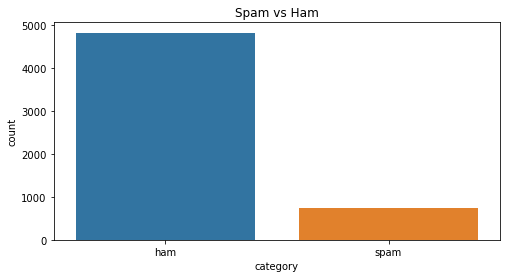

In [5]:
plt.figure(figsize=(8,4))
sns.countplot(x='category', data=sms)

plt.title('Spam vs Ham')

### Length of each mail

In [6]:
sms['length'] = sms['mail'].apply(len)
sms.head()

,category,mail,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:xlabel='length', ylabel='Count'>

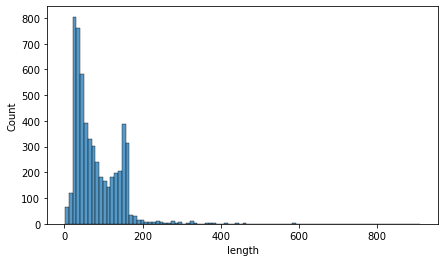

In [7]:
plt.figure(figsize=(7,4))
sns.histplot(sms[('length')])

<AxesSubplot:xlabel='length'>

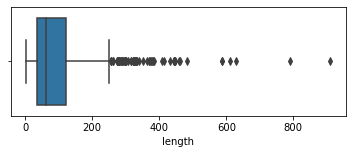

In [8]:
plt.figure(figsize=(6,2))
sns.boxplot(sms[('length')])

From the boxplot and the displot, the data seems to have clear outliers with more than 500 characters. There are 3 messages with more than 600 and 1 with more than 800 characters.

In [9]:
sms[sms['length'] > 500]

,category,mail,length
1085,ham,For me the love should start with attraction.i...,910
1579,ham,How to Make a girl Happy? It's not at all diff...,611
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2158,ham,Sad story of a Man - Last week was my b'day. M...,588
2434,ham,Indians r poor but India is not a poor country...,629
2849,ham,Sad story of a Man - Last week was my b'day. M...,588


Now, let's examine how ham and spam mail different in length.

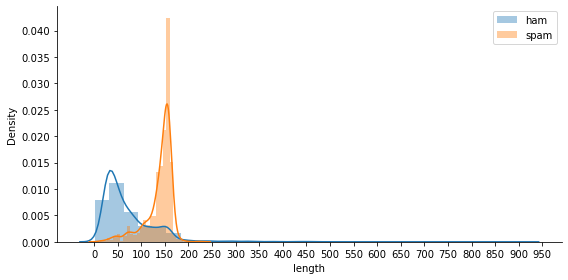

In [10]:
g = sns.FacetGrid(data=sms, hue="category", height=4, aspect=2)
g.map(sns.distplot, 'length', bins=30)
g.set(xticks=np.arange(0,1000,50))
plt.legend()

The average length of normal mail is about 40 characters while that of spam is 160. There is a big difference, so length could be a good feature to classify message labels.

# Create Model 

###  Data preprocessing 

In [11]:
sms['ham']=np.where(sms['category']=='ham',1,0) # convert categorical variable to numerical.


In [12]:
X = sms['mail']

Y = sms['ham']

Train and Test set

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 3)

In [14]:
X_train.shape

(4457,)

In this step, I will use TF-UDF to transform text data into feature vectors that can be used as input for machine learning algorithm. Punctuation and stop words (i.e. "the", "a", "to"...) are also removed.

In [15]:
features_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = 'True')

X_train_features = features_extraction.fit_transform(X_train)
X_test_features = features_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [16]:
print(X_train_features)

  (0, 5417)	0.6198254967574347
  (0, 4460)	0.4168658090846482
  (0, 2228)	0.413103377943378
  (0, 3815)	0.34780165336891333
  (0, 2333)	0.38783870336935383
  (1, 4084)	0.18880584110891163
  (1, 3189)	0.29694482957694585
  (1, 3329)	0.31610586766078863
  (1, 2961)	0.3398297002864083
  (1, 2750)	0.3398297002864083
  (1, 921)	0.22871581159877646
  (1, 1843)	0.2784903590561455
  (1, 2762)	0.3226407885943799
  (1, 2960)	0.33036995955537024
  (1, 1995)	0.33036995955537024
  (1, 3050)	0.2503712792613518
  (1, 3815)	0.17419952275504033
  (2, 409)	0.509272536051008
  (2, 3160)	0.4107239318312698
  (2, 2408)	0.45287711070606745
  (2, 6605)	0.6056811524587518
  (3, 2874)	0.5864269879324768
  (3, 7418)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5501)	0.15743785051118356
  :	:
  (4454, 4606)	0.2669765732445391
  (4454, 3146)	0.32014451677763156
  (4455, 2251)	0.37052851863170466
  (4455, 2473)	0.35441545511837946
  (4455, 5650)	0.33545678464631296
  (4455, 6814)	0.29731757715898277
  (4

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(X_train_features, Y_train)

LogisticRegression()

In [18]:
log_prediction = model.predict(X_test_features)
log_accuracy = accuracy_score(Y_test, log_prediction)

In [19]:
print(f'Accuracy on test set : {log_accuracy}')

Accuracy on test set : 0.9659192825112107


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

print(f"""
Confusion Matrix:
{confusion_matrix(Y_test, log_prediction)}

Classification Report:
{classification_report(Y_test, log_prediction)}
""")


Confusion Matrix:
[[117  38]
 [  0 960]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       155
           1       0.96      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115




## Naives Bayes

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_features, Y_train)

MultinomialNB()

In [23]:
naives_prediction = nb_classifier.predict(X_test_features)
naives_accuracy = accuracy_score(Y_test, naives_prediction)

In [24]:
print(f'Accuracy on test set : {naives_accuracy}')

Accuracy on test set : 0.9730941704035875


In [25]:
print(f"""
Confusion Matrix:
{confusion_matrix(Y_test, naives_prediction)}

Classification Report:
{classification_report(Y_test, naives_prediction)}
""")


Confusion Matrix:
[[125  30]
 [  0 960]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89       155
           1       0.97      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115




# Conclusion

Before using machine learning algorithm to identify spam messages, I vectorize the dataset of 5572 messages obtained from UCI Machine Learning Repository and removing punctuation and stop words in each message. Then I train the data with Naive Bayes algorithm and Logistic Regression. However naives bayes provide a more accurate prediction of 96%.